In [ ]:
# Recurrent Neural Network Analysis of Amzur watt reading

# made by Aditya Dubey
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 from sklearn.preprocessing import Imputer

# Importing the training set
set = pd.read_csv('data_1.csv')
size(set)
training_set =  set.iloc[2:15003,1:2].values

In [ ]:
set


In [3]:
# removing NAN with means
training_set = np.array(training_set)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(training_set)
X_train_imp = imp.transform(training_set)


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(X_train_imp)

# Getting the inputs and the ouputs
X_train = training_set[0:14999]
y_train = training_set[1:15000]

# Reshaping
X_train = np.reshape(X_train, (14999, 1, 1))

# Part 2 - Building the RNN

In [4]:
X_train

array([[[ 0.59700658]],

       [[ 0.55583157]],

       [[ 0.3556701 ]],

       ..., 
       [[ 0.37324556]],

       [[ 0.40715439]],

       [[ 0.44783257]]])

In [5]:
print(X_train)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 50)

# Part 3 - Making the predictions and visualising the results

[[[ 0.59700658]]

 [[ 0.55583157]]

 [[ 0.3556701 ]]

 ..., 
 [[ 0.37324556]]

 [[ 0.40715439]]

 [[ 0.44783257]]]
Epoch 1/50
14999/14999 [==============================] - 4s - loss: 0.0270     
Epoch 2/50
14999/14999 [==============================] - 1s - loss: 0.0201     
Epoch 3/50
14999/14999 [==============================] - 1s - loss: 0.0169     
Epoch 4/50
14999/14999 [==============================] - 1s - loss: 0.0126     
Epoch 5/50
14999/14999 [==============================] - 1s - loss: 0.0080     
Epoch 6/50
14999/14999 [==============================] - 1s - loss: 0.0053     
Epoch 7/50
14999/14999 [==============================] - 1s - loss: 0.0045     
Epoch 8/50
14999/14999 [==============================] - 1s - loss: 0.0044     
Epoch 9/50
14999/14999 [==============================] - 1s - loss: 0.0044     
Epoch 10/50
14999/14999 [==============================] - 1s - loss: 0.0044     
Epoch 11/50
14999/14999 [==============================] - 1s - loss: 0.00

In [8]:
# testung the trained RNN for test data 
test_set =  set.iloc[15003:21600,1:2].values
real_price = np.array(test_set)
# Getting the predicted stock price of 2017
inputs = real_price
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(inputs)
inputs_imp = imp.transform(inputs)
inputs_imp = sc.transform(inputs_imp)
inputs_imp = np.reshape(inputs_imp, (6597, 1, 1))
predicted_price = regressor.predict(inputs_imp)
predicted_price = sc.inverse_transform(predicted_price)


In [10]:
predicted_price


array([[ 3286.52563477],
       [ 3263.68505859],
       [ 4252.70898438],
       ..., 
       [ 2969.90429688],
       [ 2980.40917969],
       [ 3336.62109375]], dtype=float32)

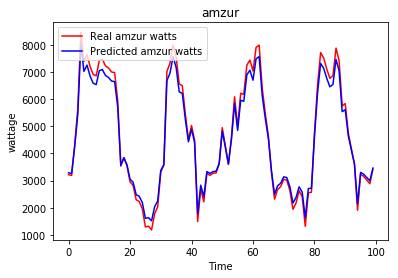

In [12]:
# Visualising the results of first hundread 100 test observation
plt.plot(real_price[0:100] , color = 'red', label = 'Real amzur watts')
plt.plot(predicted_price[0:100] , color = 'blue', label = 'Predicted amzur watts')
plt.title('amzur')
plt.xlabel('Time')
plt.ylabel('wattage')
plt.legend()
plt.show()


In [24]:
# error calculation first 100 test data at time t = t rnn predicts t+1 wattage
# therefore error = real value at t+1 - predicted value at t
i = 0
m = 0 
while i < 100:
    m = m + real_price[i+1] - predicted_price[i]       
    i = i+1
print('error :', m/100)




error : [ 85.92533081]


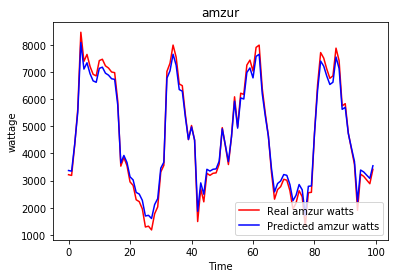

In [25]:
# Visualising the results of first hundread 100 test observation
plt.plot(real_price[0:100] , color = 'red', label = 'Real amzur watts')
plt.plot(predicted_price[0:100]+85 , color = 'blue', label = 'Predicted amzur watts') # predicted value + error plot
plt.title('amzur')
plt.xlabel('Time')
plt.ylabel('wattage')
plt.legend()
plt.show()